In [1]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.</b>

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

The main aim is to determine whether a patient is at risk of diabetes based on various characteristics and features.

There is no missing values in our data"

"Let's have more information about the dateset and check the statiscal analysis of the data"

"Interpretation: \n",
    "* The Outcome shows a minimum values equal to 0 and max=1, this will a binary classification problem\n",
    "* The minimum of features like Pregnancies\tGlucose\tBloodPressure\tSkinThickness\tInsulin\tBMI are 0 and the maximum values are continous values\n",
    "* The age of persons varies from 21 to 81, it means diabetes are more detected in adults people"

In [2]:
# from ydata_profiling import ProfileReport
# profile= ProfileReport(df)
# profile.to_notebook_iframe()

The report genetareted by pandas profiling contains all the necessary visualizations about our dataset

In [3]:
# y= df.Outcome
# X=df.drop('Outcome', axis=1)

In [4]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
# Machine Learning Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
# Data processing, metrics and modeling
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE


In [5]:
df= pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### EDA

In [9]:
#replace 0 by Nan and then reprocess
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


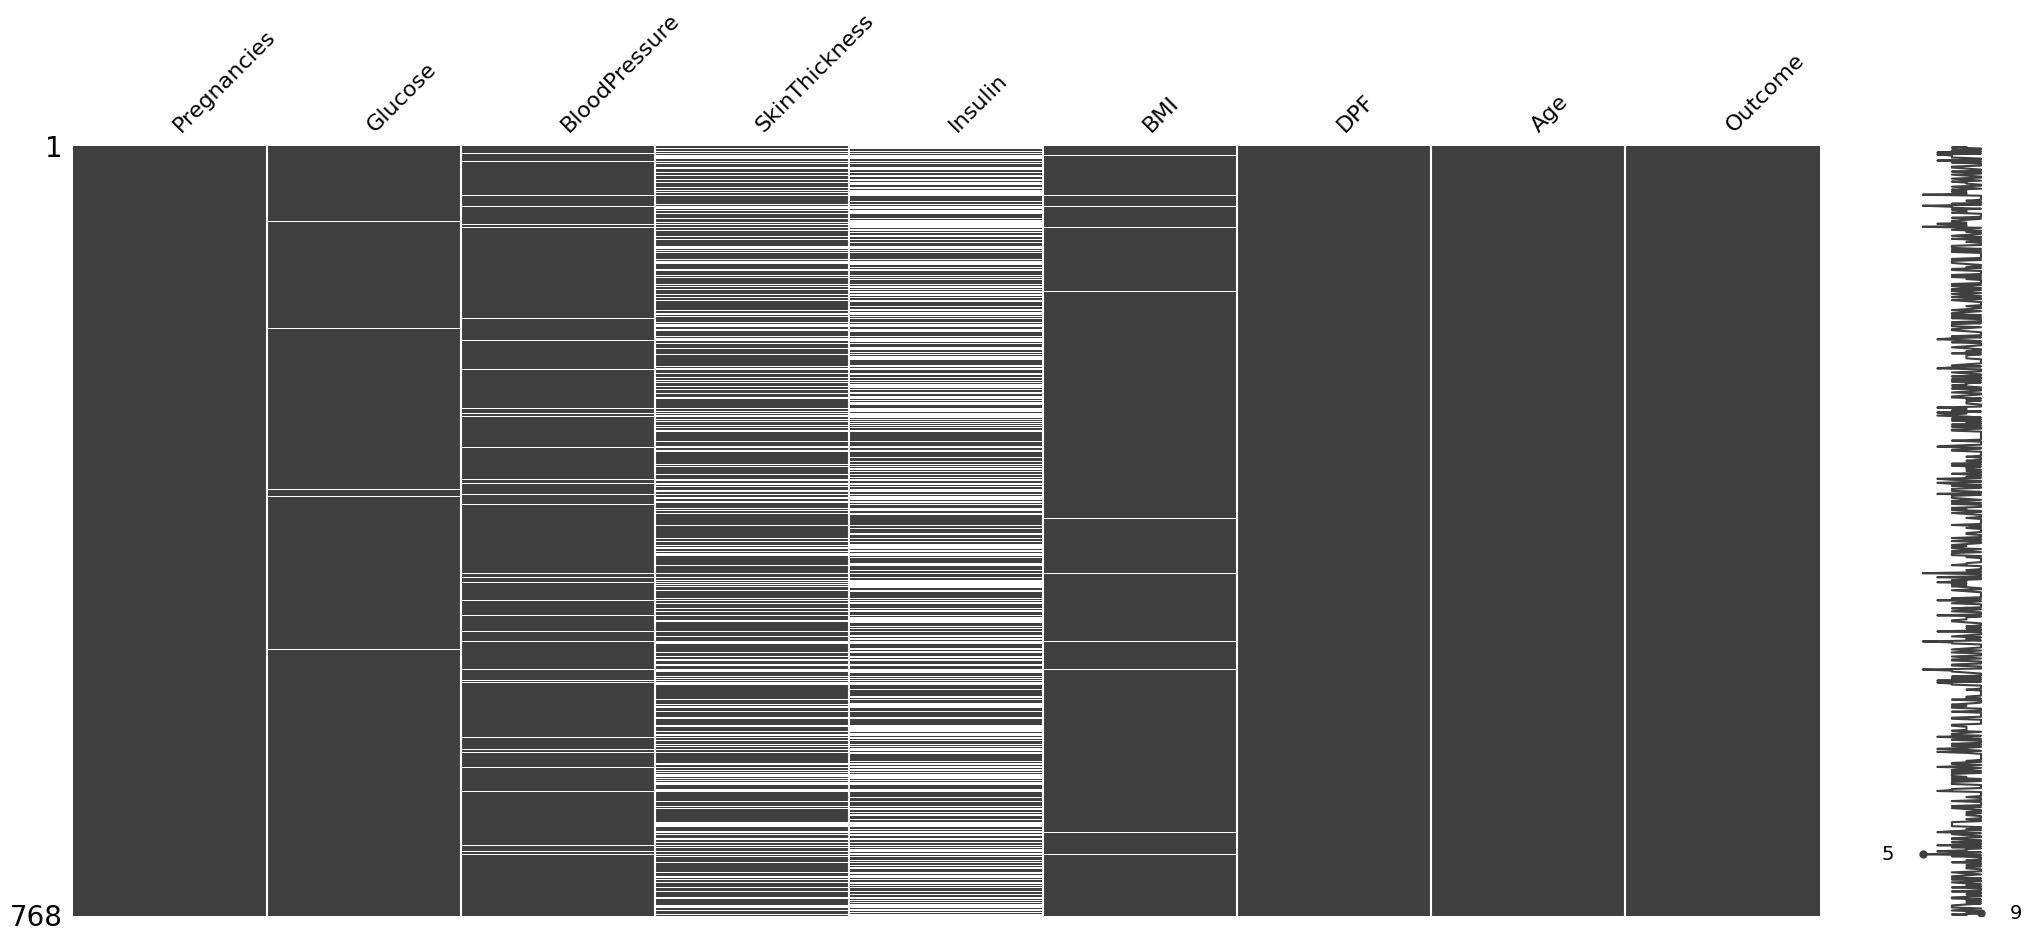

In [10]:
import missingno as msno
from datetime import date
msno.matrix(df)
plt.show()

In [11]:
# Define missing plot to detect all missing values in dataset
import plotly.graph_objs as go
import plotly.offline as py
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [12]:
# missing_plot(df, 'Outcome')

fill the missing values by taking the median according to the target variable[0-1].

In [13]:
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def replace_missing_values(data, column:str):
    data.loc[(data['Outcome'] == 0 ) & (data[column].isnull()), column] = df.groupby('Outcome')[column].median()[0]
    data.loc[(data['Outcome'] == 1 ) & (data[column].isnull()), column] = df.groupby('Outcome')[column].median()[1]
    return data

for col in missing_cols:
    replace_missing_values(df, col)

df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

<Axes: >

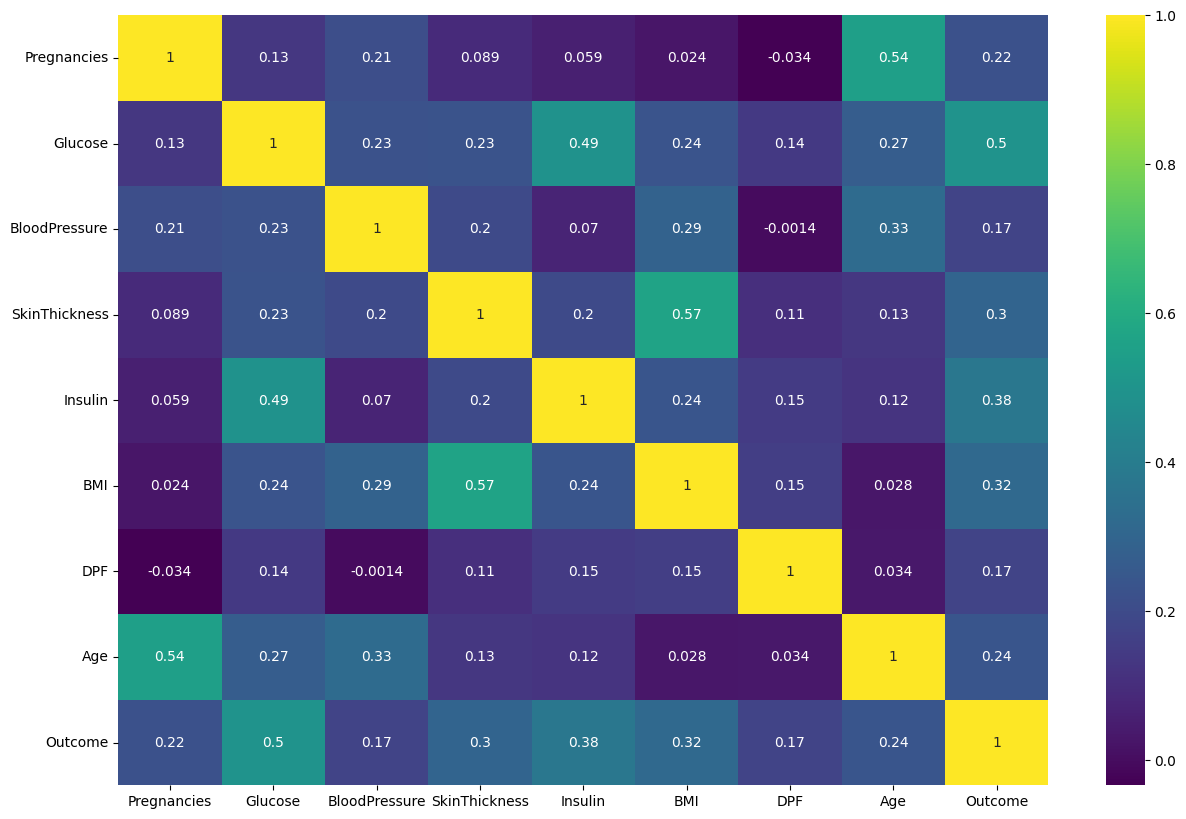

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Axes: xlabel='BloodPressure', ylabel='count'>

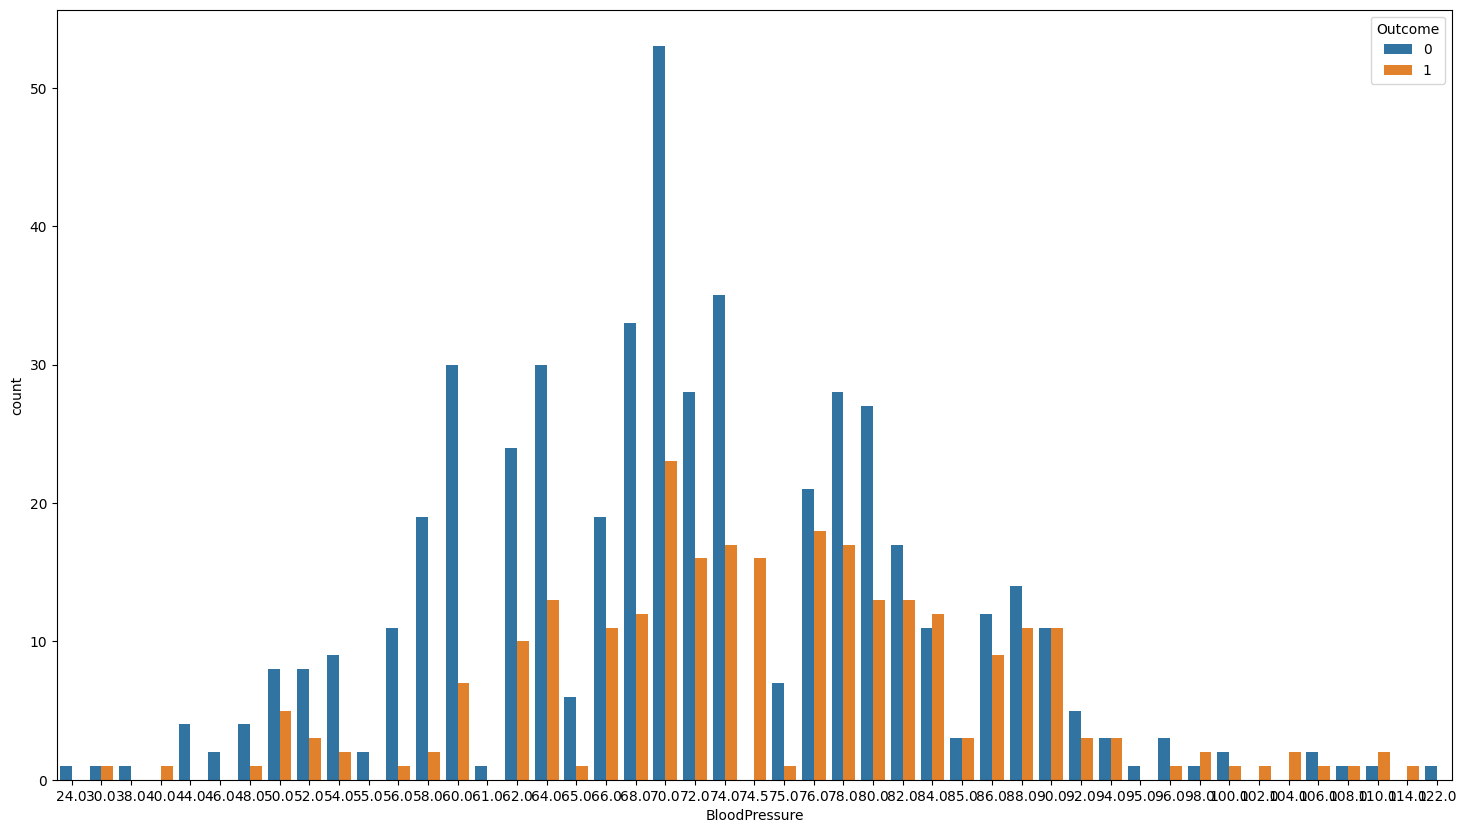

In [15]:
plt.figure(figsize=(18, 10))
sns.countplot(df, x='BloodPressure', hue='Outcome')

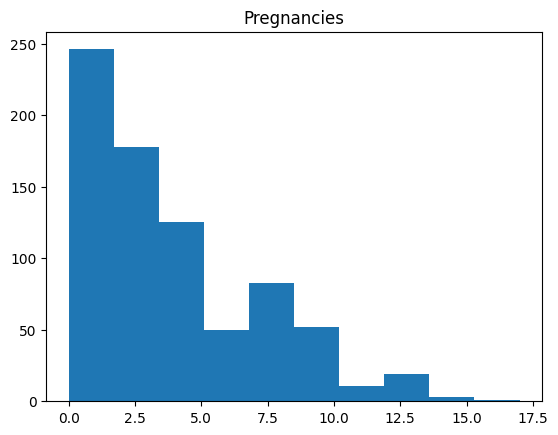

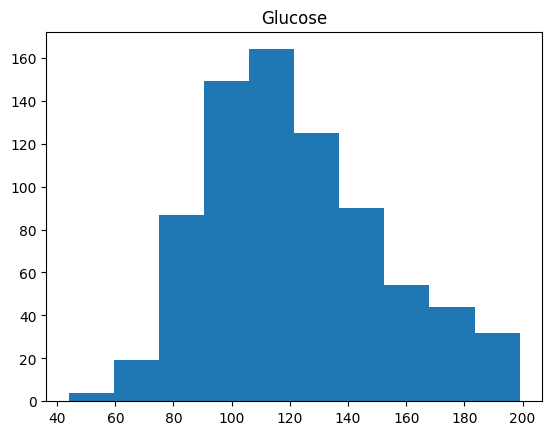

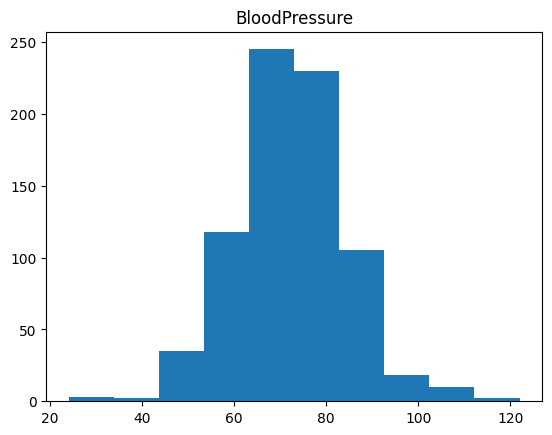

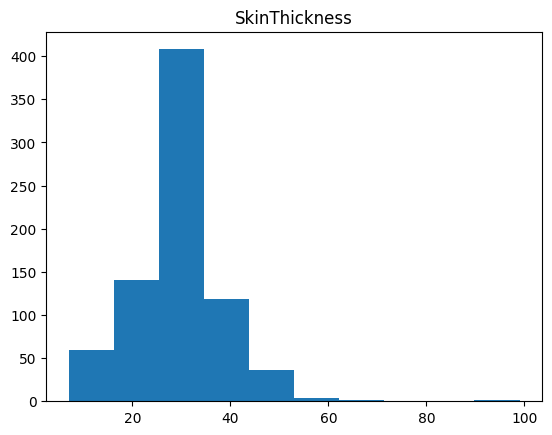

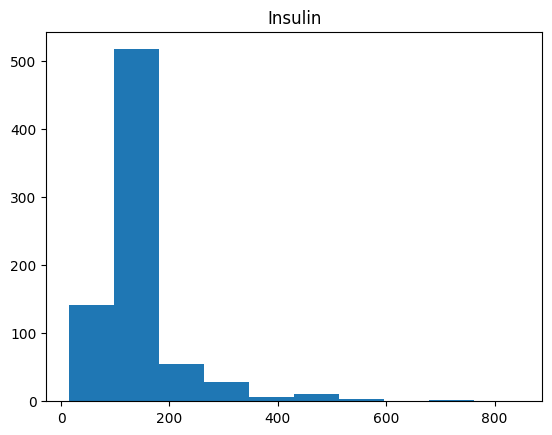

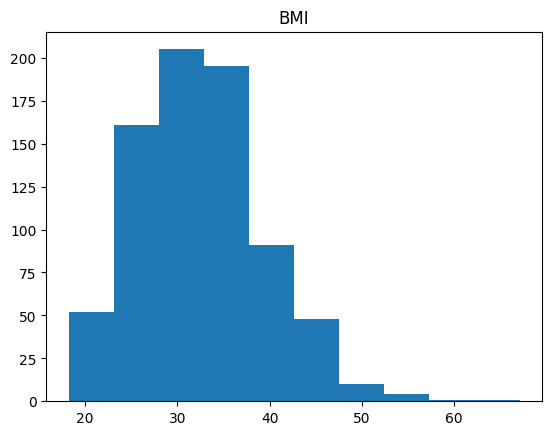

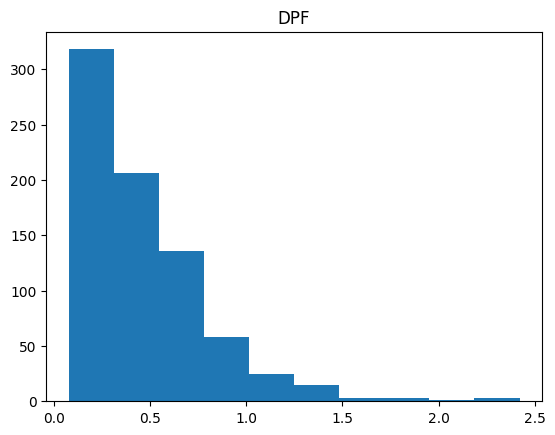

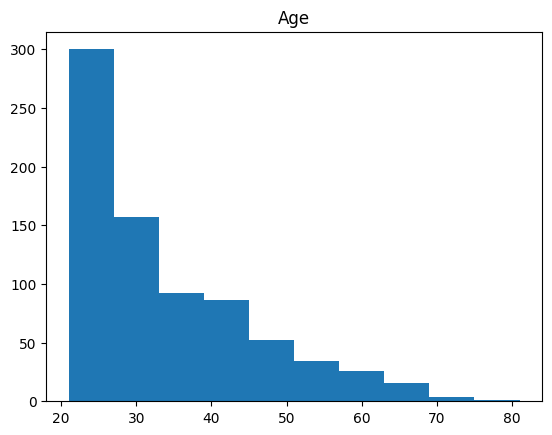

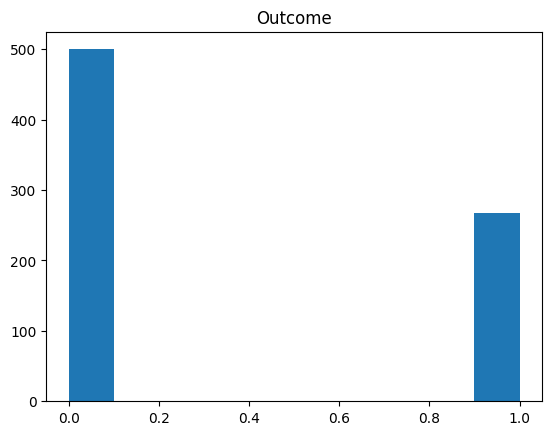

In [16]:
for col in df.columns:
    plt.title(col)
    plt.hist(df[col])
    plt.show()

### Handling Outliers

In [17]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
     # cat_cols, cat_but_car
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    return cat_cols, num_cols, cat_but_car




In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [19]:
def check_classes(df):  
    dict = {}
    for i in list(df.columns):
        dict[i] = df[i].value_counts().shape[0]

    unq = pd.DataFrame(dict,index=["Unique Count"]).transpose().sort_values(by="Unique Count", ascending=False)
    return unq

check_classes(df)

,Unique Count
DPF,517
BMI,247
Insulin,187
Glucose,135
Age,52
SkinThickness,50
BloodPressure,47
Pregnancies,17
Outcome,2


In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

low, up = outlier_thresholds(df, df.columns)

df_temp = df.describe([0.25, 0.50, 0.75, 0.95, 0.99]).T

df_temp.assign(**{"low_limit": low, "up_limit": up})

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


,count,mean,std,min,25%,50%,75%,95%,99%,max,low_limit,up_limit
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,10.00000,13.00000,17.00,-9.500000,18.500000
Glucose,768.0,121.677083,30.464161,44.000,99.75000,117.0000,140.25000,181.00000,196.00000,199.00,-6.500000,253.500000
BloodPressure,768.0,72.389323,12.106039,24.000,64.00000,72.0000,80.00000,90.00000,106.00000,122.00,24.000000,120.000000
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,44.00000,51.33000,99.00,-5.500000,62.500000
Insulin,768.0,141.753906,89.100847,14.000,102.50000,102.5000,169.50000,293.00000,519.90000,846.00,-54.725000,320.675000
BMI,768.0,32.434635,6.880498,18.200,27.50000,32.0500,36.60000,44.39500,50.75900,67.10,4.057500,60.437500
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,1.13285,1.69833,2.42,-0.654575,1.603225
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,58.00000,67.00000,81.00,-14.000000,82.000000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00000,1.00000,1.00,-1.500000,2.500000


In [21]:
# Check if there are any outliers?
def check_outlier(dataframe,col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DPF True
Age False


In [22]:
outlier_cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF']

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in outlier_cols:
    replace_with_thresholds(df, col)

In [23]:
for col in num_cols:
    print(col,check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DPF False
Age False


In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627000,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351000,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672000,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167000,21,0
4,0,137.0,40.0,35.0,168.0,43.1,1.603225,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171000,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340000,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245000,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349000,47,1


In [25]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

In [26]:
X.value_counts(), y.value_counts()

(Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DPF    Age
 0            57.0     60.0           27.0           102.500  21.7  0.735  67     1
              67.0     76.0           27.0           102.500  45.3  0.194  46     1
 5            104.0    74.0           27.0           102.500  28.8  0.153  48     1
              105.0    72.0           29.0           320.675  36.9  0.159  28     1
              106.0    82.0           30.0           102.500  39.5  0.286  38     1
                                                                                 ..
 2            84.0     70.0           27.0           102.500  30.1  0.304  21     1
              85.0     65.0           27.0           102.500  39.6  0.930  27     1
              87.0     58.0           16.0           52.000   32.7  0.166  25     1
                       70.0           23.0           102.500  28.9  0.773  25     1
 17           163.0    72.0           41.0           114.000  40.9  0.817  47    

Text(0.5, 1.0, "Diabetes's target countplot")

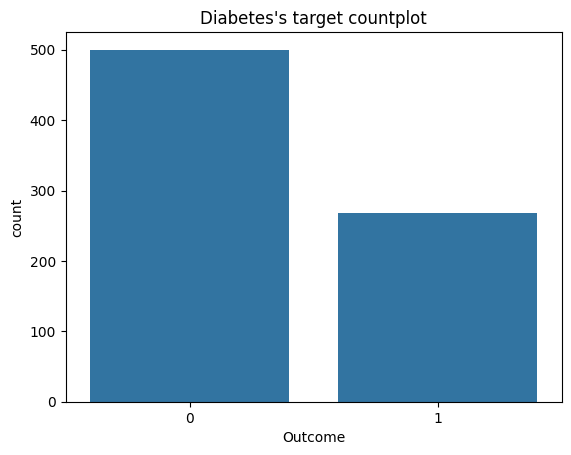

In [27]:
sns.countplot(df, x=y)
plt.title("Diabetes's target countplot")

In [28]:
# Test-Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,stratify = y, test_size = 0.2, shuffle = True)

#### Balance the data

In [29]:
# oversample
# The data is imbalanced. Therefore I use smote method to oversample the data

oversample = SMOTE(random_state=42, k_neighbors=10)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote
y_smote.value_counts()

0    400
1    400
Name: Outcome, dtype: int64

In [30]:
# y_train.value_counts()

In [31]:
def make_classification(X_train, X_test, y_train, y_test):
    accuracy,f1,auc,= [],[],[]

    random_state = 42

    ##classifiers
    classifiers = []
    classifiers.append(SVC(kernel='rbf'))
    classifiers.append(LogisticRegression(random_state = random_state,solver='lbfgs', max_iter=10000))
#     classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())
    classifiers.append(XGBClassifier(random_state = random_state))
    
    


    for classifier in classifiers:

        #classifier and fitting
        clf = classifier
        clf.fit(X_train,y_train)

        #predictions
        y_preds = clf.predict(X_test)
#         y_probs = clf.predict_proba(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test,y_preds)))*100)
        f1.append(((f1_score(y_test,y_preds)))*100)
#        auc.append(((roc_auc_score(y_test,y_probs[:,1])))*100)


    results_df = pd.DataFrame({"Accuracy Score":accuracy,
                        "f1 Score":f1,
                        "ML Models":["SVM","LogisticRegression",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors",
                                     "XGBoost"]})

    results = (results_df.sort_values(by = ['f1 Score'], ascending = False)
                  .reset_index(drop =  True))
    
    return classifiers,results



In [32]:
## Without normalization

In [33]:
classifiers,results = make_classification(X_train, X_test, y_train, y_test)

results

,Accuracy Score,f1 Score,ML Models
0,89.610390,85.714286,GradientBoosting
1,86.363636,81.415929,XGBoost
2,86.363636,81.081081,RandomForest
3,83.766234,78.632479,KNeighboors
4,81.168831,76.033058,SVM
5,74.675325,69.291339,LogisticRegression


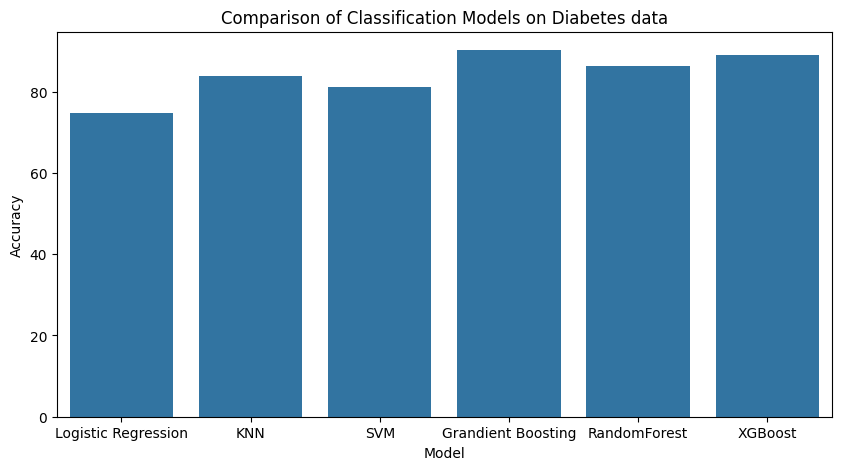

In [34]:
accuracy_scores = {
    'Logistic Regression': 74.675325,
    'KNN': 83.766234,
    'SVM':  81.168831,
    'Grandient Boosting': 90.259740,
    'RandomForest':86.363636,
    'XGBoost': 88.961039
}

# Convert the dictionary to a pandas DataFrame
import pandas as pd
df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])

# Create a barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=df)
plt.title('Comparison of Classification Models on Diabetes data')
plt.show()

In [35]:
## After Normalization

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# scaler = StandardScaler()
# X_train_nor = scaler.fit_transform(X_train)
# X_test_nor = scaler.transform(X_test)
# Create MinMaxScaler\n",
scaler = MinMaxScaler()

# Fit and transform on training data\n",
X_train_nor = scaler.fit_transform(X_train)

# Transform the test data using the same scaler\n",
X_test_nor = scaler.transform(X_test)

In [37]:
classifiers,results = make_classification(X_train_nor, X_test_nor, y_train, y_test)

results

,Accuracy Score,f1 Score,ML Models
0,89.610390,85.714286,GradientBoosting
1,86.363636,81.415929,XGBoost
2,86.363636,81.081081,RandomForest
3,83.766234,78.260870,SVM
4,82.467532,78.048780,KNeighboors
5,75.324675,69.841270,LogisticRegression


In [38]:
clf=GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [39]:
print("Gradient Boosting accuracy on test data")
clf.score(X_test, y_test)

Gradient Boosting accuracy on test data


0.8961038961038961

In [40]:
print("Gradient Boosting accuracy on train data")
clf.score(X_train, y_train)

Gradient Boosting accuracy on train data


0.97875

In [41]:
y_pred_gb=clf.predict(X_test)

In [42]:
from sklearn.metrics import classification_report
print("Classification_report for GradientBoosting"),
print(classification_report(y_test, y_pred_gb))

Classification_report for GradientBoosting
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       100
           1       0.83      0.89      0.86        54

    accuracy                           0.90       154
   macro avg       0.88      0.89      0.89       154
weighted avg       0.90      0.90      0.90       154



In [43]:
### Hyper Paramter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 10, 100, 1000],  
#             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            #'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
     'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [10,7,9,11,13,15],

            'metric' : ['manhattan']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth':[3,10,2],
         
        }
    },
    'xg_boost': {
        'model': XGBClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth': [3, 6, 9], 
            'max_leaf_nodes': [3, 6, 9]
        }
    },
    
   'gradient_boosting': {  # Correctly nest Gradient Boosting
        'model': GradientBoostingClassifier(random_state=1234),
        'params': {
            'n_estimators': [1,5,10],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            #'C': [1,5,10,15],
            'C' : np.logspace(-4, 4, 20),
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100,200, 300,500]
        }
    }
}

In [45]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

c:\Users\Mariam\predapp\lib\site-packages\xgboost\core.py:160: UserWarning:

[17:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.


c:\Users\Mariam\predapp\lib\site-packages\xgboost\core.py:160: UserWarning:

[17:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.


c:\Users\Mariam\predapp\lib\site-packages\xgboost\core.py:160: UserWarning:

[17:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_leaf_nodes" } are not used.


c:\Users\Mariam\predapp\lib\site-packages\xgboost\core.py:160: UserWarning:

[17:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscali

,model,best_score,best_params
0,svm,0.84500,"{'C': 1, 'kernel': 'linear'}"
1,knn,0.87125,"{'metric': 'manhattan', 'n_neighbors': 7}"
2,random_forest,0.88500,"{'max_depth': 10, 'n_estimators': 10}"
3,xg_boost,0.89000,"{'max_depth': 6, 'max_leaf_nodes': 3, 'n_estim..."
4,gradient_boosting,0.87750,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti..."
5,logistic_regression,0.83500,"{'C': 0.0001, 'max_iter': 100, 'solver': 'lbfgs'}"


In [46]:
rf_model= RandomForestClassifier(max_depth=10, n_estimators=10)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8311688311688312

In [47]:
rf_model.score(X_train, y_train)

0.9875

In [48]:
y_pred_rf=rf_model.predict(X_test)

In [49]:
## Classiifaction for Random forest Model
from sklearn.metrics import classification_report
print("Classiifcation report for RandomForest"),
print(classification_report(y_test, y_pred_rf))

Classiifcation report for RandomForest
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       100
           1       0.73      0.83      0.78        54

    accuracy                           0.83       154
   macro avg       0.81      0.83      0.82       154
weighted avg       0.84      0.83      0.83       154



Confusion Matrix forfor RandomForest


<Axes: >

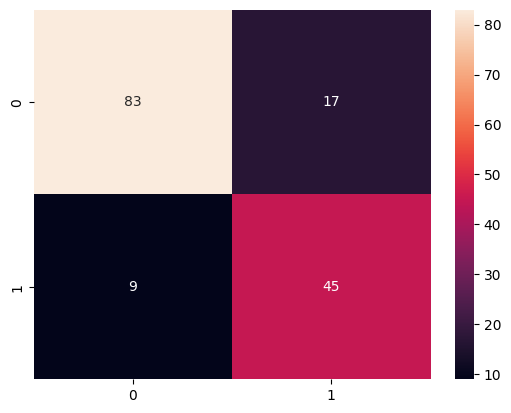

In [50]:
## Confusion Matrix for Random Forest Model
from sklearn.metrics import confusion_matrix
print("Confusion Matrix forfor RandomForest"),
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)

Confusion Matrix for GradientBoosting


<Axes: >

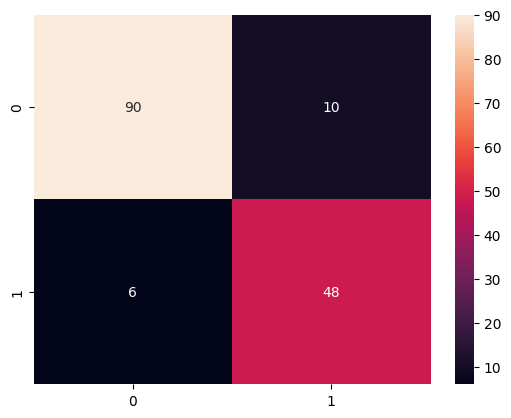

In [51]:
## Confusion Matrix for Gradient Boosting Model
from sklearn.metrics import confusion_matrix
print("Confusion Matrix for GradientBoosting"),
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True)

In [52]:
print("The training score with Gradient Boosting is:", clf.score(X_train, y_train))
print("The test score with Gradient Boosting is:", clf.score(X_test, y_test))

The training score with Gradient Boosting is: 0.8375
The test score with Gradient Boosting is: 0.7922077922077922


In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the false positive rate (FPR)  \n",
# and true positive rate (TPR) for different classification thresholds \n",
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb, pos_label=1)
# Compute the ROC AUC score \n",
roc_auc = roc_auc_score(y_test, y_pred_gb)

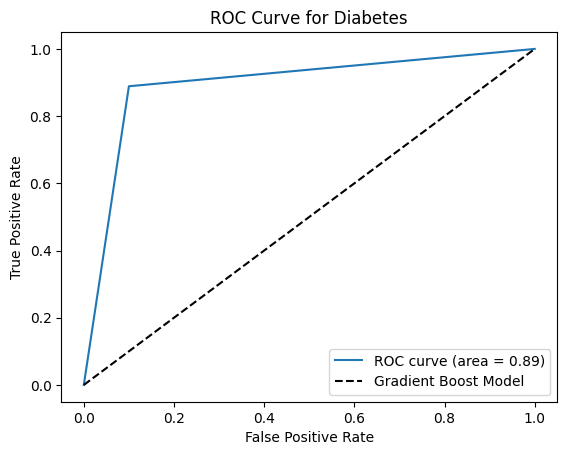

In [54]:
# Plot the ROC curve \n",
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr \n",
plt.plot([0, 1], [0, 1], 'k--', label='Gradient Boost Model') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve for Diabetes') 
plt.legend()
plt.show()

##Model saving

In [55]:
import joblib
filename = 'diabetes_model.joblib'
joblib.dump(clf, open(filename, 'wb'))

##Model Testing

In [56]:
# loading the saved model
loaded_model = joblib.load(open('diabetes_model.joblib', 'rb'))

In [57]:
X.shape

(768, 8)

In [58]:
#input_data = (85,0,1,85,80,0,0,10,0,3.6,1,5,5)
input_data=(6, 148, 72, 35, 0, 33.6, 0.627, 50)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print('The Person has a less chance to be affected by Diabetes')
else:
    print('The Person has a high probability to be affected by Diabetes')

[0]
The Person has a less chance to be affected by Diabetes


c:\Users\Mariam\predapp\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

